In [1]:
# clustering

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
pip install folium

Text(0.5, 1.0, 'pixles with Precipitation')

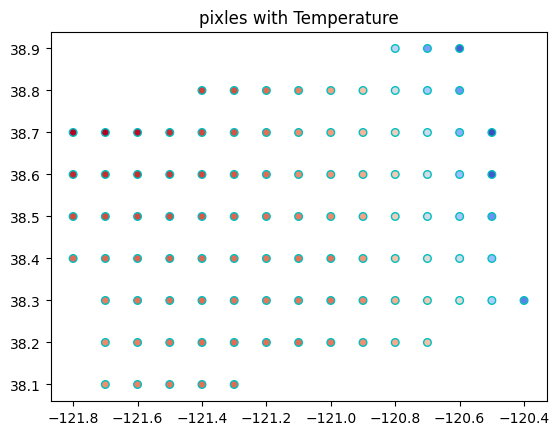

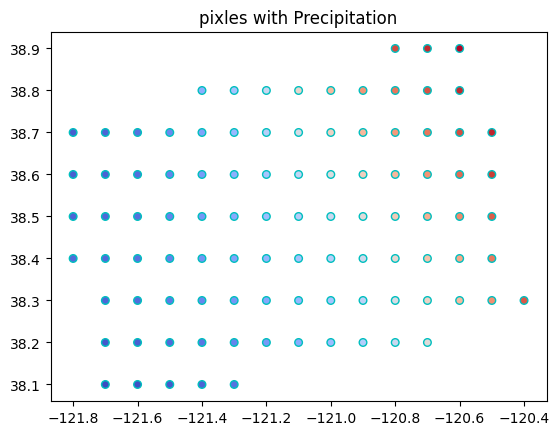

In [4]:
with open('precip_temp_2010_average.txt') as f:
    lines = f.readlines()

num_of_rows = len(lines)

var = np.zeros((num_of_rows - 1 , 5)) # save first fourth variables
                                      # in the files

for num in range(1 , num_of_rows): # we don't need the first row
    xx = lines[num] # variable to save each line of lines
    l = []
    for t in xx.split('	'):
        try:
            l.append(float(t))
        except ValueError:
            pass
    var[num -1 , :] = l[0 : 5]


fig, ax = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax.scatter(var[: , 2] , var[: , 1] , c=var[: , 3], cmap=plt.cm.coolwarm, s=30, edgecolors="c")
ax.set_title("pixles with Temperature")


fig, ax1 = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax1.scatter(var[: , 2] , var[: , 1] , c=var[: , 4], cmap=plt.cm.coolwarm, s=30, edgecolors="c")
ax1.set_title("pixles with Precipitation")

In [32]:
from google.colab import output
output.enable_custom_widget_manager()

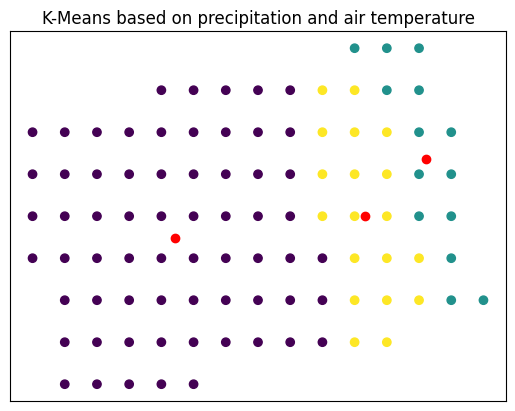

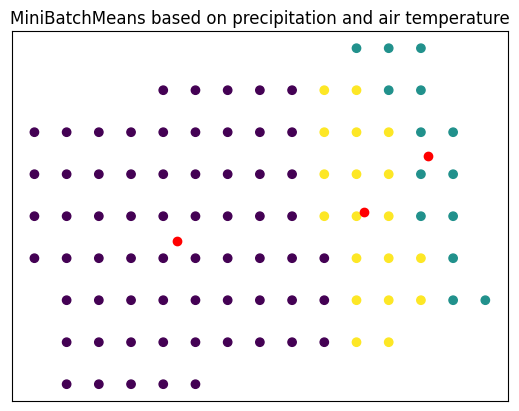

[[  38.4408933  -121.35791563  288.77434102]
 [  38.64400826 -120.57954545  284.78945814]
 [  38.51051805 -120.77566719  287.14370979]]


In [39]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(var[: , 1 : 4])

mbk = MiniBatchKMeans(init="k-means++", n_clusters=3, n_init=10)
mbk.fit(var[: , 1 : 4])

from sklearn.metrics.pairwise import pairwise_distances_argmin

#have the same color for the same cluster from both the MiniBatchKMeans and the KMeans algorithm.
#pair the cluster centers per closest one.

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(var[: , 1 : 4], k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(var[: , 1 : 4], mbk_means_cluster_centers)

# Plot kmeans
plt.figure(1)
centers = k_means_cluster_centers
plt.scatter(var[: , 2], var[: , 1], c=k_means_labels)
plt.scatter(centers[:, 1], centers[:, 0], c="r")
plt.title("K-Means based on precipitation and air temperature")
plt.xticks([])
plt.yticks([])
plt.show()

# Plot MiniBatchKmeans
plt.figure(2)
centers = mbk.cluster_centers_
plt.scatter(var[: , 2], var[: , 1], c=mbk_means_labels)
plt.scatter(centers[:, 1], centers[:, 0], c="r")
plt.title("MiniBatchMeans based on precipitation and air temperature")
plt.xticks([])
plt.yticks([])
plt.show()

print (centers)

In [34]:

import folium



# Create the map centered on the average latitude and longitude
center_lat = np.mean(var[:, 1])
center_lon = np.mean(var[:, 2])
map = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Add terrain basemap
folium.TileLayer('Stamen Terrain').add_to(map)

# Plotting scatter plot with K-Means clustering
for i in range(len(var)):
    cluster_label = k_means.labels_[i]
    color = 'magenta' if cluster_label == 0 else 'blue' if cluster_label == 1 else 'green' if cluster_label == 2 else \
        'orange' if cluster_label == 3 else 'purple' if cluster_label == 4 else 'yellow' if cluster_label == 5 else \
        'cyan' if cluster_label == 6 else 'pink' if cluster_label == 7 else 'brown' if cluster_label == 8 else 'pink'
    folium.CircleMarker(location=[var[i, 1], var[i, 2]], radius=5, color=color, fill=True,
                        fill_color=color, fill_opacity=0.7).add_to(map)

# Add clustering centers

centers = k_means.cluster_centers_
for center in centers:
    folium.CircleMarker(location=[center[0], center[1]], radius=5, color='red', fill=True,
                        fill_color='white', fill_opacity=1).add_to(map)



# Display the map
map



In [35]:

import folium



# Create the map centered on the average latitude and longitude
center_lat = np.mean(var[:, 1])
center_lon = np.mean(var[:, 2])
map2 = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Add terrain basemap
folium.TileLayer('Stamen Terrain').add_to(map2)

# Plotting scatter plot with MinibBatchK-Means clustering
for i in range(len(var)):
    cluster_label = mbk.labels_[i]
    color = 'magenta' if cluster_label == 0 else 'blue' if cluster_label == 1 else 'green' if cluster_label == 2 else \
        'orange' if cluster_label == 3 else 'purple' if cluster_label == 4 else 'yellow' if cluster_label == 5 else \
        'cyan' if cluster_label == 6 else 'pink' if cluster_label == 7 else 'brown' if cluster_label == 8 else 'pink'
    folium.CircleMarker(location=[var[i, 1], var[i, 2]], radius=5, color=color, fill=True,
                        fill_color=color, fill_opacity=0.7).add_to(map2)
# Add clustering centers

centers2 = mbk.cluster_centers_
for center in centers2:
    folium.CircleMarker(location=[center[0], center[1]], radius=5, color='white', fill=True,
                        fill_color='red', fill_opacity=1).add_to(map2)


# Display the map
map2


[False False False False False  True False False False False False False
 False False False False False False  True False False  True False False
  True False False False False False False False  True False False  True
 False False False False False False False False  True  True  True  True
 False False False False False False  True  True  True  True  True  True
  True  True  True False False False False False  True  True  True  True
  True  True  True  True False  True False False False False  True  True
  True  True  True  True  True  True False  True False  True  True  True
  True  True]


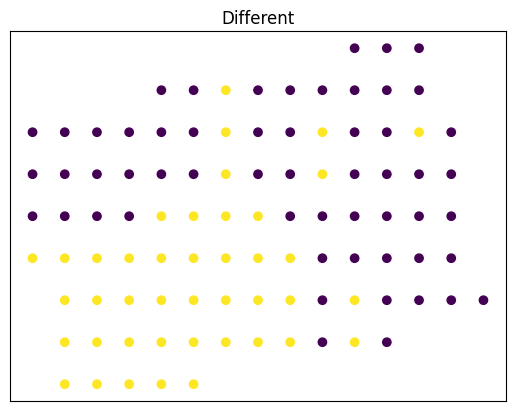

In [36]:
# Plot different pixels


different = mbk.labels_ ==4

ax = fig.add_subplot(1, 3, 3)
for k in range(5):
    different += (k_means_labels== k) != (mbk_means_labels == k)
print (different)

plt.figure(3)
plt.scatter(var[: , 2], var[: , 1], c=different)
plt.title("Different")
plt.xticks([])
plt.yticks([])
plt.show()

In [40]:
from sklearn.metrics import pairwise_distances

# Calculate SSE for K-means
k_means_sse =0.0
for i in range(len(var)):
    centroid = k_means_cluster_centers [k_means_labels[i]]
    distance = pairwise_distances(var[i, 1:4].reshape(1, -1), centroid.reshape(1, -1), metric='euclidean')
    k_means_sse += distance ** 2


# Calculate SSE for MiniBatchKMeans
mbk_means_sse = 0.0
for i in range(len(var)):
    centroid = mbk_means_cluster_centers[mbk_means_labels[i]]
    distance = pairwise_distances(var[i, 1:4].reshape(1, -1), centroid.reshape(1, -1), metric='euclidean')
    mbk_means_sse += distance ** 2

print("K-means SSE:", k_means_sse)
print("MiniBatchKMeans SSE:", mbk_means_sse)


K-means SSE: [[31.94012438]]
MiniBatchKMeans SSE: [[31.97485619]]


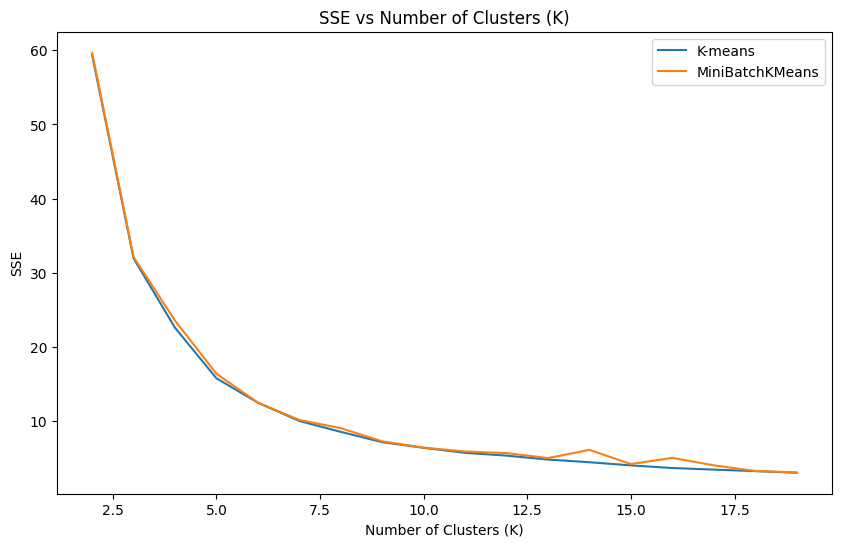

In [38]:

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin

# Initialize empty lists to store SSE values for each K
k_values = range(2, 20)  # Set the range of K values (e.g., from 1 to 10)
k_means_sse_values = []
mbk_means_sse_values = []

# Load your data into the 'var' variable here
# var = ...

# Perform K-means clustering for each K value
for k in k_values:
    k_means = KMeans(init="k-means++", n_clusters=k, n_init=10)
    k_means.fit(var[:, 1:4])
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = pairwise_distances_argmin(var[:, 1:4], k_means_cluster_centers)
    k_means_sse = np.sum((var[:, 1:4] - k_means_cluster_centers[k_means_labels]) ** 2)
    k_means_sse_values.append(k_means_sse)

# Perform MiniBatchKMeans clustering for each K value
for k in k_values:
    mbk = MiniBatchKMeans(init="k-means++", n_clusters=k, n_init=10)
    mbk.fit(var[:, 1:4])
    mbk_means_cluster_centers = mbk.cluster_centers_
    mbk_means_labels = pairwise_distances_argmin(var[:, 1:4], mbk_means_cluster_centers)
    mbk_means_sse = np.sum((var[:, 1:4] - mbk_means_cluster_centers[mbk_means_labels]) ** 2)
    mbk_means_sse_values.append(mbk_means_sse)

# Plot SSE values for each K value
plt.figure(figsize=(10,6))
plt.plot(k_values, k_means_sse_values, label='K-means')
plt.plot(k_values, mbk_means_sse_values, label='MiniBatchKMeans')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('SSE vs Number of Clusters (K)')
plt.legend()
plt.show()
